In [1]:
import numpy as np
from bson import json_util
import helix as hx
from helix import units
import numpy as np
import strax as sx                    
from matplotlib import pyplot as plt
from glob import glob 
import os
import shutil

raw_data_dir = 'toy_data'  # to save the raw toy data
helix_data_dir = 'test_helix_data'  # to save the run metadata
run = 'run10' 
duration = 10  # seconds
baseline_step = 0  # add a baseline equal to baseline_step*channel_index to each channel 

In [2]:
for path in glob(f'{helix_data_dir}/*'):
    if os.path.isdir(path):
        shutil.rmtree(path)
    else:
        os.remove(path)
    
hx.generate_toy_data(run, duration, raw_data_dir, helix_data_dir=helix_data_dir, overwrite=True, baseline_step=baseline_step)

  0%|                                                     | 0/1 [00:00<?, ?it/s]

    trace_idx: 0, start_idx: 0, ich: 0
    trace_idx: 1, start_idx: 135248, ich: 0
    trace_idx: 2, start_idx: 270496, ich: 0
    trace_idx: 3, start_idx: 405744, ich: 0
    trace_idx: 4, start_idx: 540992, ich: 0
    trace_idx: 5, start_idx: 676240, ich: 0
    trace_idx: 6, start_idx: 811488, ich: 0
    trace_idx: 7, start_idx: 946736, ich: 0
    trace_idx: 8, start_idx: 1081984, ich: 0
    trace_idx: 9, start_idx: 1217232, ich: 0
    trace_idx: 10, start_idx: 0, ich: 1
    trace_idx: 11, start_idx: 135248, ich: 1
    trace_idx: 12, start_idx: 270496, ich: 1
    trace_idx: 13, start_idx: 405744, ich: 1
    trace_idx: 14, start_idx: 540992, ich: 1
    trace_idx: 15, start_idx: 676240, ich: 1
    trace_idx: 16, start_idx: 811488, ich: 1
    trace_idx: 17, start_idx: 946736, ich: 1
    trace_idx: 18, start_idx: 1081984, ich: 1
    trace_idx: 19, start_idx: 1217232, ich: 1
    trace_idx: 20, start_idx: 0, ich: 2
    trace_idx: 21, start_idx: 135248, ich: 2
    trace_idx: 22, start_idx: 2

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  3.01it/s]

    trace_idx: 80, start_idx: 0, ich: 48
    trace_idx: 81, start_idx: 135248, ich: 48
    trace_idx: 82, start_idx: 270496, ich: 48
    trace_idx: 83, start_idx: 405744, ich: 48
    trace_idx: 84, start_idx: 540992, ich: 48
    trace_idx: 85, start_idx: 676240, ich: 48
    trace_idx: 86, start_idx: 811488, ich: 48
    trace_idx: 87, start_idx: 946736, ich: 48
    trace_idx: 88, start_idx: 1081984, ich: 48
    trace_idx: 89, start_idx: 1217232, ich: 48
    trace_idx: 90, start_idx: 0, ich: 49
    trace_idx: 91, start_idx: 135248, ich: 49
    trace_idx: 92, start_idx: 270496, ich: 49
    trace_idx: 93, start_idx: 405744, ich: 49
    trace_idx: 94, start_idx: 540992, ich: 49
    trace_idx: 95, start_idx: 676240, ich: 49
    trace_idx: 96, start_idx: 811488, ich: 49
    trace_idx: 97, start_idx: 946736, ich: 49
    trace_idx: 98, start_idx: 1081984, ich: 49
    trace_idx: 99, start_idx: 1217232, ich: 49


In [2]:
context = sx.Context(storage=[sx.DataDirectory(helix_data_dir, provide_run_metadata=True), ],
                     register=[hx.MMCRecords,
                               hx.QPTriggers, hx.UVTriggers,
                               hx.Events, hx.NoiseEvents,
                               hx.NoisePSDs, hx.FitResults])    # all the plugins required for getting fit_results
config = {'run_metadata_directory': helix_data_dir,      # for the hx.ToyDataRawRecords plugin
          'noise_events_random_seed': 0}  # for the hx.NoiseEvents plugin
context.set_config(config)

In [3]:
records = context.get_array(run, 'raw_records')
uv_triggers = context.get_array(run, 'uv_triggers')
qp_triggers = context.get_array(run, 'qp_triggers')
events = context.get_array(run, 'events')
fit_results = context.get_array(run, 'fit_results')  
raw_data = events['channel_data']
noise_psds = context.get_array(run, 'noise_psds')

Loading raw_records: |              | 0.00 % [00:00<?], #1 (0.05 s). 2712.9 MB/s
Loading uv_triggers: |                | 0.00 % [00:00<?], #1 (0.00 s). 10.5 MB/s
Loading qp_triggers: |                 | 0.00 % [00:00<?], #1 (0.00 s). 6.6 MB/s
Loading events: |                   | 0.00 % [00:00<?], #1 (0.07 s). 2575.4 MB/s
Loading fit_results: |                 | 0.00 % [00:03<?], #1 (3.26 s). 6.0 kB/s
Loading noise_psds: |               | 0.00 % [00:00<?], #1 (0.02 s). 7422.7 MB/s


In [5]:
# Get available plugins and their provided data types
print("Available plugins and provided data types:")
for plugin_name, plugin_class in context._plugin_class_registry.items():
    print(f"{plugin_name}: {plugin_class.provides}")


Available plugins and provided data types:
raw_records: ('raw_records',)
qp_triggers: ('qp_triggers',)
uv_triggers: ('uv_triggers',)
events: ('events',)
noise_events: ('noise_events',)
noise_psds: ('noise_psds',)
fit_results: ('fit_results',)


In [6]:
noise_psds['psds'].shape

(1, 50, 16385)

In [7]:
noise_psds['frequencies']

array([[0.00000000e+00, 7.62939453e+00, 1.52587891e+01, ...,
        1.24984741e+05, 1.24992371e+05, 1.25000000e+05]])

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_psd_separate(psd_data):
    """
    Plots the PSD of channels 0 and 49 in one figure and all other channels in another figure.

    Parameters:
    - psd_data: np.ndarray of shape (1, num_channels, num_frequencies)
    """
    if psd_data.ndim != 3:
        raise ValueError("Expected PSD data of shape (1, num_channels, num_frequencies)")

    # Remove the first singleton dimension (batch dimension)
    psd_data = psd_data[0]

    num_channels, num_frequencies = psd_data.shape

    # Ensure channel 49 exists
    if num_channels <= 49:
        raise ValueError("Channel 49 does not exist in the provided data.")

    # Plot channels 0 and 49 separately
    plt.figure(figsize=(10, 6))
    plt.plot(psd_data[0], label="Channel 0", color='b')
    plt.plot(psd_data[49], label="Channel 49", color='r')
    plt.xlabel("Frequency Bin")
    plt.ylabel("Power Spectral Density (ADC²/Hz)")
    plt.title("Power Spectral Density (PSD) - Channels 0 & 49")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot all other channels in another plot
    plt.figure(figsize=(10, 6))
    for ch in range(num_channels):
        if ch not in [0, 49]:  # Exclude channels 0 and 49
            plt.plot(psd_data[ch], label=f"Channel {ch}")

    plt.xlabel("Frequency Bin")
    plt.ylabel("Power Spectral Density (ADC²/Hz)")
    plt.title("Power Spectral Density (PSD) - All Other Channels")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
# Assuming 'psds' is your PSD data array with shape (1, num_channels, num_frequencies)
# plot_psd_separate(psds)


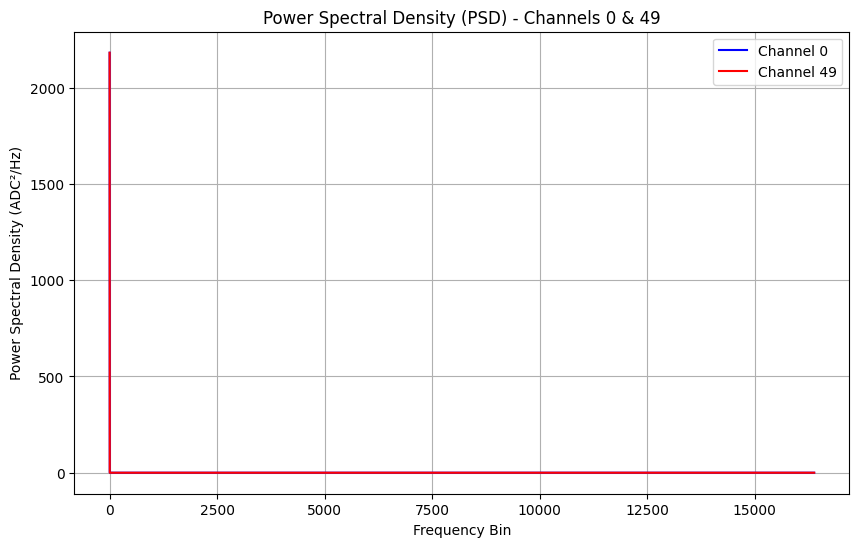

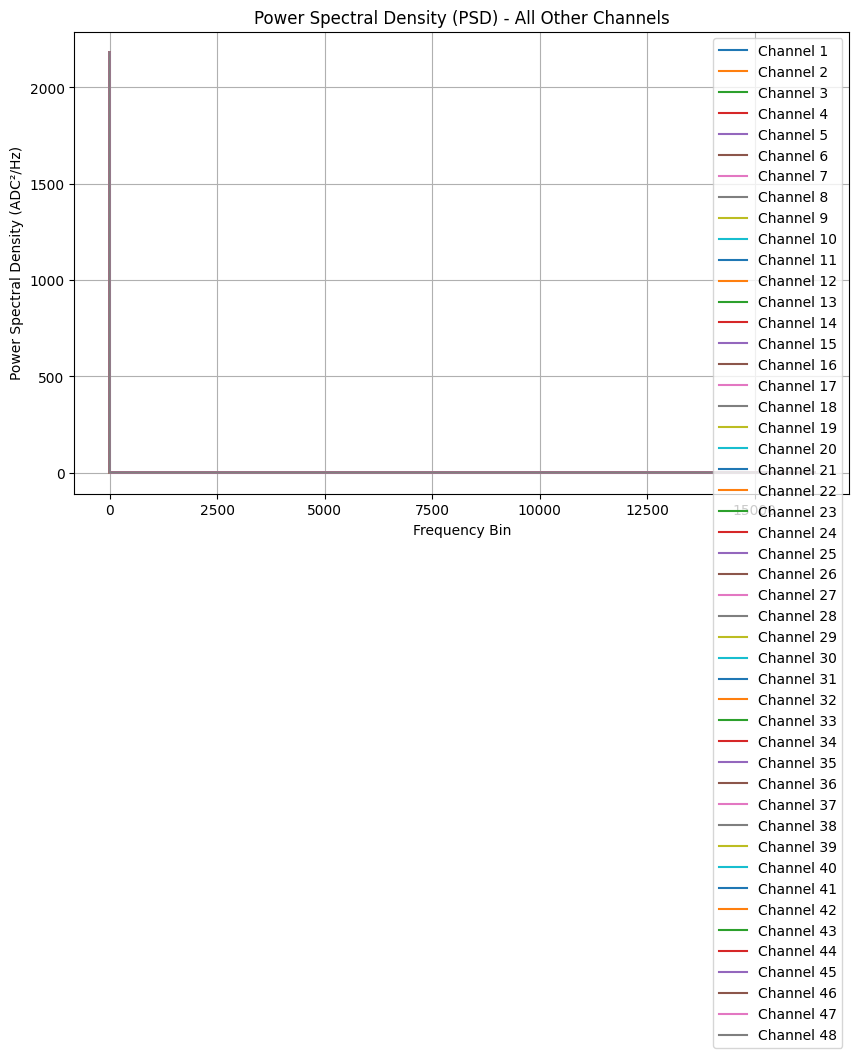

In [9]:
plot_psd_separate(noise_psds['psds'])


In [13]:
for i in range(9):
    event = fit_results[i]
    print(event['vacuum_channel_qp_amplitude'][-1])
    print(event['vacuum_channel_fit_chi2'][-1])
    print(event['submerged_channel_uv_amplitude'][0])
    print(event['submerged_channel_fit_chi2'][0])

    print()
    


10458.509749816127
144.40551577315017
10404.179275966284
144.8744256576254

10456.095458573247
144.652543355027
10421.170047280295
144.84112567569798

10531.279158288606
147.6191087371354
10493.54386031501
147.8405529386048

10447.391868841623
144.4872937037264
10402.2730140791
144.8079371066816

-63.47441870094917
169.60593211562
11403.718112951643
170.12714659764933

10446.781083657683
144.87181460705665
10416.230608488015
145.01402352098907

-33.36583672738925
144.54519098797616
10399.863836767447
144.68324859053894

-51.41669635406288
144.14889209653788
10406.97166105321
144.4888872763082

-39.478793256901554
145.08722425430955
10411.47472846705
145.2839990163093



In [4]:
def view_raw_records(context, run, start_ch, end_ch):
    records = context.get_array(run, 'raw_records')
    channels = hx.Channels(hx.DEFAULT_CHANNEL_MAP)
    
    selected_channels = [ch for ch in channels if start_ch <= ch <= end_ch]
    
    unique_blocks = np.sort(np.unique(records['block_id']))
    for i in unique_blocks:
        record_mask = records['block_id'] == i
        plt.figure(figsize=(12, 10))
        
        print(f"Plotting channels: {selected_channels[0]} to {selected_channels[-1]}")
        
        for idx, ch in enumerate(selected_channels):  # Plot selected channel range
            mask = record_mask & (records['channel'] == ch)
            record = records['data'][mask][0]
            add_baseline = 300 * idx  # Incremental baseline for visibility
            plt.plot(record + add_baseline, color='C0', lw=0.5)
        
        plt.xlabel('Time (samples)')
        plt.ylabel('Current w/artificial baselines (ADC)')
        plt.ylim(-30000, 20000)  # Fix y-scale from 0 to 20000

        plt.show()
        
        if i >= 3:
            break


Loading raw_records: |              | 0.00 % [00:00<?], #1 (0.04 s). 2876.7 MB/s


Plotting channels: 7 to 7


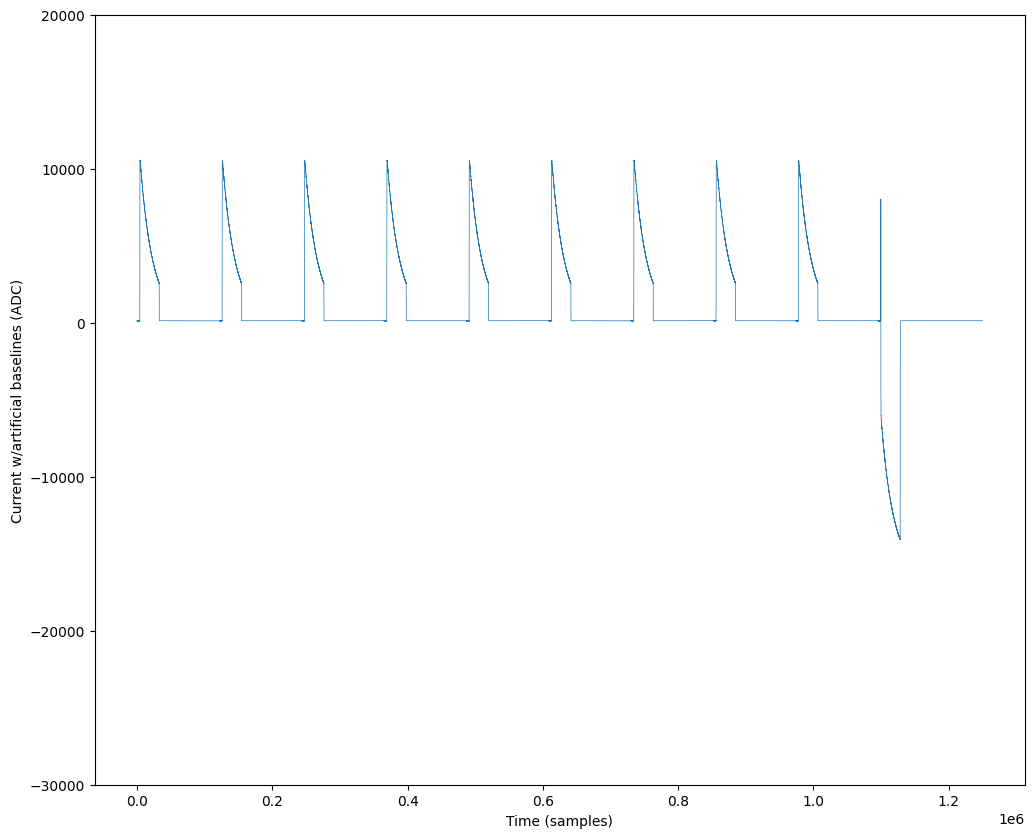

In [5]:
view_raw_records(context, run, 7, 7)

In [8]:
import pandas as pd
def plot_from_csv(file_path, start_ch, end_ch):
    df = pd.read_csv(file_path, header=None)
    
    plt.figure(figsize=(12, 10))
    
    selected_channels = df.iloc[start_ch:end_ch]
    print(f"Plotting channels: {start_ch} to {end_ch}")
    
    for idx, (ch, row) in enumerate(selected_channels.iterrows()):
        avg_value = row.mean()
        print(f"Trace {ch}: Average Value = {avg_value:.2f}")
        add_baseline = 300 * idx  # Incremental baseline for visibility
        plt.plot(row.values + add_baseline, lw=0.5)
    
    plt.xlabel('Time (samples)')
    plt.ylabel('Current w/artificial baselines (ADC)')
    plt.ylim(-2000, 20000)  # Fix y-scale from 0 to 20000
    plt.show()

Plotting channels: 0 to 99
Trace 0: Average Value = 4929.44
Trace 1: Average Value = 4938.07
Trace 2: Average Value = 4972.18
Trace 3: Average Value = 4926.21
Trace 4: Average Value = 5385.16
Trace 5: Average Value = 4933.85
Trace 6: Average Value = 4926.40
Trace 7: Average Value = 4929.37
Trace 8: Average Value = 4931.96
Trace 9: Average Value = 4929.76
Trace 10: Average Value = 4932.30
Trace 11: Average Value = 5385.72
Trace 12: Average Value = 4939.48
Trace 13: Average Value = 4940.69
Trace 14: Average Value = 4931.82
Trace 15: Average Value = 4931.56
Trace 16: Average Value = 5386.52
Trace 17: Average Value = 4941.72
Trace 18: Average Value = 4928.37
Trace 19: Average Value = 4940.49
Trace 20: Average Value = 5387.99
Trace 21: Average Value = 4938.31
Trace 22: Average Value = 4934.82
Trace 23: Average Value = 4935.86
Trace 24: Average Value = 7516.52
Trace 25: Average Value = 4939.55
Trace 26: Average Value = 5327.02
Trace 27: Average Value = 5386.08
Trace 28: Average Value = 4928.

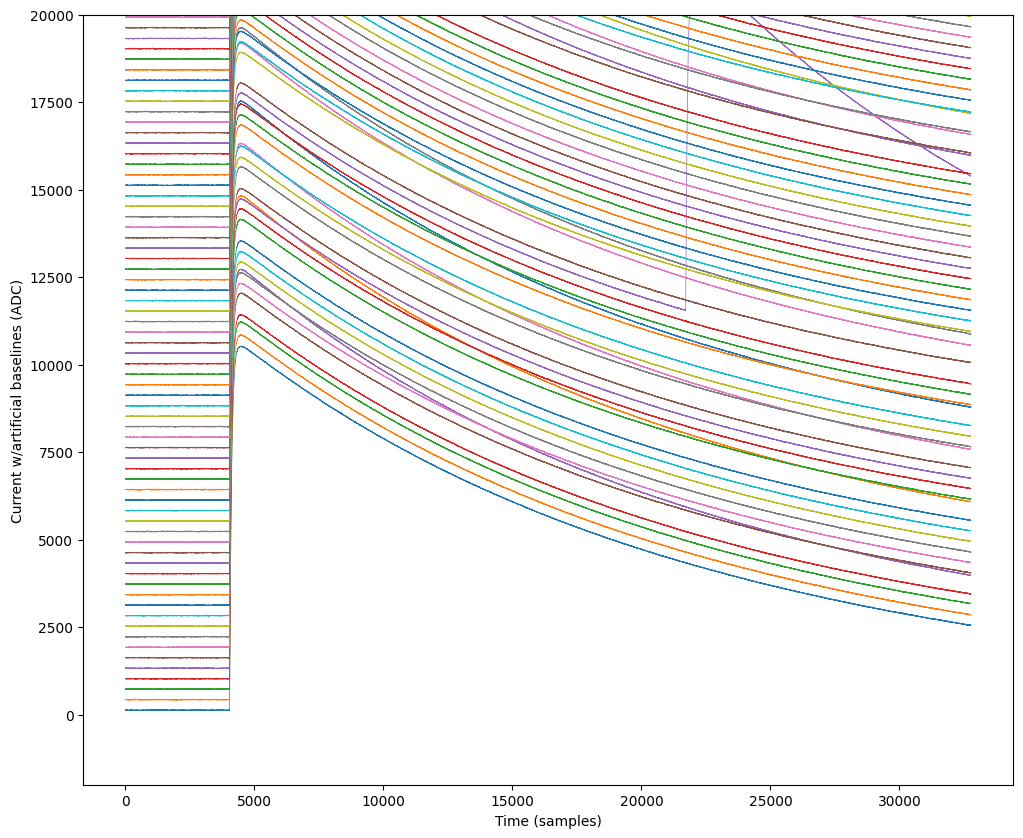

In [9]:
plot_from_csv('traces.csv', 0, 99)